<a href="https://colab.research.google.com/github/magomeda228/Deep-Learning/blob/main/Fine_tuning_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

from tqdm.auto import tqdm
import os
import shutil

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})

In [ ]:
import torch
from torchvision.models import mobilenet_v3_small
from torchvision import transforms as T
from PIL import Image

In [ ]:
model = mobilenet_v3_small(weights="IMAGENET1K_V1")
model.eval()
sum(param.numel() for param in model.parameters())

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 72.9MB/s]


2542856

In [40]:
%%bash
wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
wget https://i.natgeofe.com/k/66d3a80c-f4c3-4410-845c-3543375eaa85/cheetah-watching_square.jpg -O cheetah.jpg

--2025-01-16 14:55:48--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.139.104, 16.15.177.218, 54.231.227.96, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.139.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json.1’

     0K .......... .......... .......... ....                 100% 49.6K=0.7s

2025-01-16 14:55:50 (49.6 KB/s) - ‘imagenet_class_index.json.1’ saved [35363/35363]

--2025-01-16 14:55:50--  https://i.natgeofe.com/k/66d3a80c-f4c3-4410-845c-3543375eaa85/cheetah-watching_square.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 23.58.144.236, 23.58.144.243, 2600:1413:5000:25::1738:6110, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|23.58.144.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085277 (1.0M) [image/jpeg]
Saving to: ‘cheetah.j

In [ ]:
import json
class_idx = json.load(open('imagenet_class_index.json'))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [41]:
normalize = T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    normalize,
])

In [ ]:
@torch.no_grad()
def predict(image):
    probs = model(
        transform(image).unsqueeze(0)
    ).squeeze().softmax(dim=0)

    class_id = probs.argmax().item()
    print(f'class ID: {class_id}, class name: {idx2label[class_id]}, '
          f'confidence: {100 * probs[class_id].item():.2f}%')

In [42]:
!wget 'https://naked-science.ru/wp-content/uploads/2016/12/field_image_cheetah-02.jpg'

--2025-01-16 14:55:55--  https://naked-science.ru/wp-content/uploads/2016/12/field_image_cheetah-02.jpg
Resolving naked-science.ru (naked-science.ru)... 65.108.236.53
Connecting to naked-science.ru (naked-science.ru)|65.108.236.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 828100 (809K) [image/jpeg]
Saving to: ‘field_image_cheetah-02.jpg.1’

field_image_cheetah 100%[===================>] 808.69K   845KB/s    in 1.0s    

2025-01-16 14:55:57 (845 KB/s) - ‘field_image_cheetah-02.jpg.1’ saved [828100/828100]



class ID: 293, class name: cheetah, confidence: 99.38%


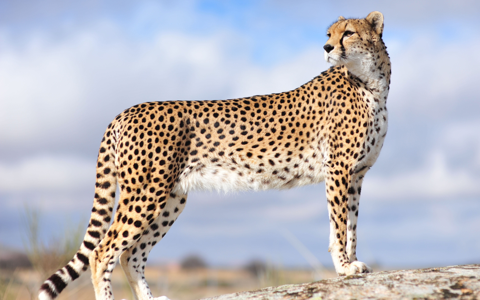

In [ ]:
image = Image.open('field_image_cheetah-02.jpg')
predict(image)
image.resize([item // 8 for item in image.size])

In [67]:
!wget 'https://sun9-34.userapi.com/c850216/v850216669/110118/s1XSv_XLgtY.jpg'

--2025-01-16 15:45:42--  https://sun9-34.userapi.com/c850216/v850216669/110118/s1XSv_XLgtY.jpg
Resolving sun9-34.userapi.com (sun9-34.userapi.com)... 93.186.227.145
Connecting to sun9-34.userapi.com (sun9-34.userapi.com)|93.186.227.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222549 (217K) [image/jpeg]
Saving to: ‘s1XSv_XLgtY.jpg.1’

s1XSv_XLgtY.jpg.1   100%[===================>] 217.33K   378KB/s    in 0.6s    

2025-01-16 15:45:44 (378 KB/s) - ‘s1XSv_XLgtY.jpg.1’ saved [222549/222549]



In [72]:
image = Image.open('s1XSv_XLgtY.jpg')#.resize([item // 2 for item in image.size])
image = transform(image).unsqueeze(0).to(device)
predict(image)
image.resize([item //3 for item in image.size])

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

--2025-01-16 09:55:41--  https://a.d-cd.net/tEAAAgE2ZuA-1920.jpg
Resolving a.d-cd.net (a.d-cd.net)... 91.215.43.222
Connecting to a.d-cd.net (a.d-cd.net)|91.215.43.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253373 (247K) [image/jpeg]
Saving to: ‘tEAAAgE2ZuA-1920.jpg’

tEAAAgE2ZuA-1920.jp 100%[===================>] 247.43K  --.-KB/s    in 0.02s   

2025-01-16 09:55:41 (12.8 MB/s) - ‘tEAAAgE2ZuA-1920.jpg’ saved [253373/253373]

class ID: 179, class name: Staffordshire_bullterrier, confidence: 42.74%


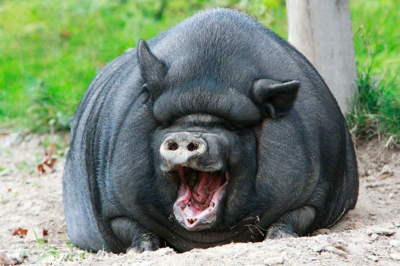

In [ ]:
!wget 'https://a.d-cd.net/tEAAAgE2ZuA-1920.jpg'
image = Image.open('tEAAAgE2ZuA-1920.jpg')#.resize([item // 2 for item in image.size])
predict(image)
image.resize([item // 3 for item in image.size])

--2025-01-16 09:55:41--  https://i.pinimg.com/originals/cd/86/d2/cd86d2897c6094ffc2452b7380d9cce1.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114782 (112K) [image/jpeg]
Saving to: ‘cd86d2897c6094ffc2452b7380d9cce1.jpg’

cd86d2897c6094ffc24 100%[===================>] 112.09K  --.-KB/s    in 0.01s   

2025-01-16 09:55:41 (10.7 MB/s) - ‘cd86d2897c6094ffc2452b7380d9cce1.jpg’ saved [114782/114782]

class ID: 341, class name: hog, confidence: 86.22%


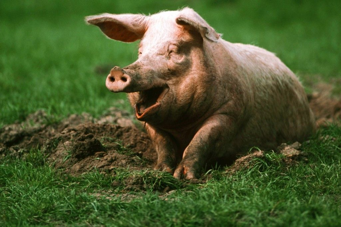

In [ ]:
!wget 'https://i.pinimg.com/originals/cd/86/d2/cd86d2897c6094ffc2452b7380d9cce1.jpg'
image = Image.open('cd86d2897c6094ffc2452b7380d9cce1.jpg')#.resize([item // 2 for item in image.size])
predict(image)
image.resize([item // 3 for item in image.size])

Посомтрим как некоторые фотогорафии модель классифицирует

In [43]:
%%bash
wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
unzip -q cats_and_dogs_filtered.zip
rm cats_and_dogs_filtered.zip
rm cats_and_dogs_filtered/vectorize.py

--2025-01-16 14:56:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

     0K .......... .......... .......... .......... ..........  0%  236K 4m43s
    50K .......... .......... .......... .......... ..........  0%  236K 4m43s
   100K .......... .......... .......... .......... ..........  0%  715K 3m40s
   150K .......... .......... .......... .......... ..........  0%  599K 3m13s
   200K .......... .......... .......... .......... ..........  0%  805K 2m50s
   250K .......... .......... .......... .......... ..........  0%  915K 2m34s
   300K .......... .......... .......... .......... ..........  0% 1.19M 2m20s
   350K ...

CalledProcessError: Command 'b'wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip\nunzip -q cats_and_dogs_filtered.zip\nrm cats_and_dogs_filtered.zip\nrm cats_and_dogs_filtered/vectorize.py\n'' returned non-zero exit status 1.

In [ ]:
!ls cats_and_dogs_filtered

train  validation


In [ ]:
!ls cats_and_dogs_filtered/train

cats  dogs


In [ ]:
!du -sh cats_and_dogs_filtered

72M	cats_and_dogs_filtered


In [ ]:
wd = !pwd
path = wd[0] + '/'
path

'/content/'

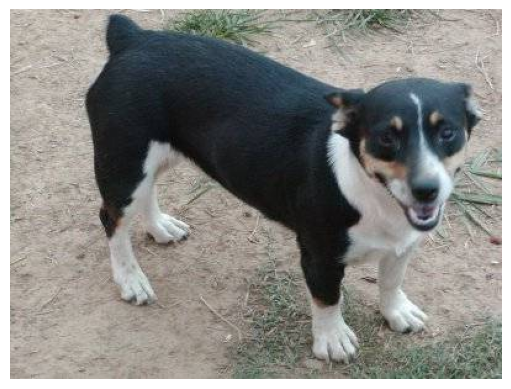

In [ ]:
import glob

file = np.random.choice(glob.glob(path + "/cats_and_dogs_filtered/*/*/*.jpg"))
plt.axis("off")
plt.imshow(plt.imread(file));

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

import torch.nn.functional as F
import torch.optim as optim
from torch import nn

import torchvision.transforms as T
from torchvision.datasets import ImageFolder

from sklearn.model_selection import train_test_split

print(torchvision.__version__)

0.20.1+cu121


In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [45]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])

test_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    normalize,
])

dataset = ImageFolder(
    path + "/cats_and_dogs_filtered/train",
    transform = test_transform
)

In [46]:
dataset.classes

['cats', 'dogs']

In [ ]:
image, label = next(iter(dataset))

In [ ]:
image.shape

torch.Size([3, 224, 224])

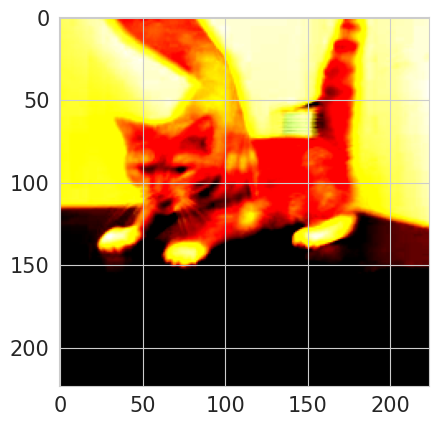

In [ ]:
plt.imshow(np.transpose(image, (1, 2, 0)));

In [47]:
train_simple_set, val_simple_set = torch.utils.data.random_split(
    dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))]
)

In [48]:
train_simple_dataloader = DataLoader(train_simple_set, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)
val_simple_dataloader = DataLoader(val_simple_set, batch_size=256, shuffle=False, pin_memory=True, num_workers=4)

In [49]:
class PetDataset(Dataset):
    SPLIT_RANDOM_SEED = 42
    TEST_SIZE = 0.25

    def __init__(self, root, train=True, load_to_ram=True, transform=None):
        super().__init__()
        self.root = root
        self.train = train
        self.load_to_ram = load_to_ram  # подгружать ли датасет в память полностью
        self.transform = transform

    def __len__(self):
        pass

    def __getitem__(self, item):
        pass

In [50]:
class PetDataset(Dataset):
    SPLIT_RANDOM_SEED = 42
    TEST_SIZE = 0.25

    def __init__(self, root, train=True, load_to_ram=True, transform=None):
        super().__init__()
        self.root = root
        self.train = train
        self.load_to_ram = load_to_ram # подгружать ли датасет в память полностью
        self.transform = transform
        self.to_tensor = T.ToTensor()
        self.all_files = []
        self.all_labels = []
        self.images = []

        self.classes = sorted(os.listdir(self.root))
        for i, class_name in tqdm(enumerate(self.classes), total=len(self.classes)):
            files = sorted(os.listdir(os.path.join(self.root, class_name)))
            train_files, test_files = train_test_split(files, random_state=self.SPLIT_RANDOM_SEED + i,
                                                       test_size=self.TEST_SIZE)
            if self.train:
                self.all_files += train_files
                self.all_labels += [i] * len(train_files)
                if self.load_to_ram:
                    self.images += self._load_images(train_files, i)

            else:
                self.all_files += test_files
                self.all_labels += [i] * len(test_files)
                if self.load_to_ram:
                    self.images += self._load_images(test_files, i)

    def _load_images(self, image_files, label):
        images = []
        for filename in image_files:
            image = Image.open(os.path.join(self.root, self.classes[label], filename)).convert('RGB')
            images += [image]

        return images

    def __len__(self):
        return len(self.all_files)

    def __getitem__(self, item):
        label = self.all_labels[item]
        if self.load_to_ram:
            image = self.images[item]
        else:
            filename = self.all_files[item]
            image = Image.open(os.path.join(self.root, self.classes[label], filename)).convert('RGB')

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [51]:
train_dataset = PetDataset(root='cats_and_dogs_filtered/train', train=True, load_to_ram=False)

  0%|          | 0/2 [00:00<?, ?it/s]

In [52]:
train_dataset.classes

['cats', 'dogs']

In [ ]:
# все картинки подружены в память
image, label = train_dataset[42]

In [ ]:
image

tensor([[[ 2.1119,  2.1290,  2.1290,  ...,  2.1975,  2.1975,  2.2147],
         [ 2.1119,  2.1290,  2.1290,  ...,  2.1975,  2.1975,  2.2147],
         [ 2.0948,  2.1119,  2.1119,  ...,  2.1975,  2.1975,  2.2147],
         ...,
         [-0.7479, -0.7650, -0.7822,  ..., -1.7240, -1.7240, -1.7069],
         [-0.7993, -0.7993, -0.7993,  ..., -1.7412, -1.7240, -1.7240],
         [-0.8335, -0.8164, -0.7993,  ..., -1.7069, -1.7412, -1.7754]],

        [[ 1.5357,  1.5532,  1.5532,  ...,  1.9209,  1.9209,  1.9384],
         [ 1.5357,  1.5532,  1.5532,  ...,  1.9209,  1.9209,  1.9384],
         [ 1.5182,  1.5357,  1.5357,  ...,  1.9209,  1.9209,  1.9384],
         ...,
         [-1.0728, -1.0903, -1.1078,  ..., -1.7206, -1.7206, -1.6506],
         [-1.1253, -1.1253, -1.1253,  ..., -1.7381, -1.7206, -1.6681],
         [-1.1604, -1.1429, -1.1253,  ..., -1.7206, -1.7381, -1.7206]],

        [[ 0.3742,  0.3916,  0.3916,  ...,  0.8274,  0.8274,  0.8448],
         [ 0.3742,  0.3916,  0.3916,  ...,  0

In [53]:
train_dataset = PetDataset(root='cats_and_dogs_filtered/train', train=True,
                               load_to_ram=True, transform=test_transform)

val_dataset = PetDataset(root='cats_and_dogs_filtered/train', train=False,
                              load_to_ram=True, transform=test_transform)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [54]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, pin_memory=True, num_workers=4)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm


sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [ ]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size

        optimizer.zero_grad()
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    return train_loss, train_accuracy


@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    return test_loss, test_accuracy


def train(model, optimizer, scheduler, criterion, train_loader, test_loader, num_epochs):
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        test_loss, test_accuracy = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        train_losses += [train_loss]
        train_accuracies += [train_accuracy]
        test_losses += [test_loss]
        test_accuracies += [test_accuracy]
        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

    return train_losses, test_losses, train_accuracies, test_accuracies

In [ ]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

num_epochs = 50
model = mobilenet_v2(num_classes=len(train_dataset.classes)).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

In [ ]:
sum(param.numel() for param in model.parameters())

2226434

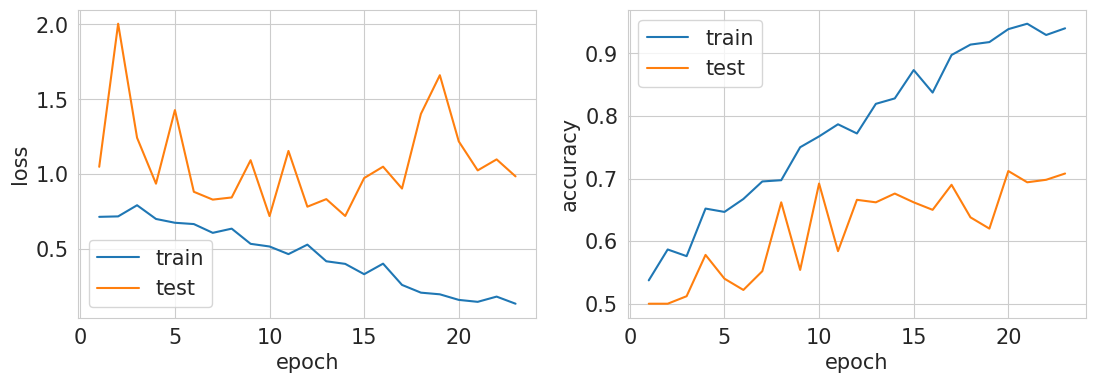

Training 24/50:   0%|          | 0/47 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, optimizer, scheduler, criterion, train_loader, val_loader, num_epochs
)

Здесь модель классифицирует фотографиии кошек и собак без аугментации, сравним данный результат с тем что будет на аугментации, как лосс функцию так и точность

In [55]:
train_transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.5, 1.0)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])

In [56]:
train_dataset.transform = train_transform
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)

In [57]:
model = mobilenet_v2(num_classes=len(train_dataset.classes)).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

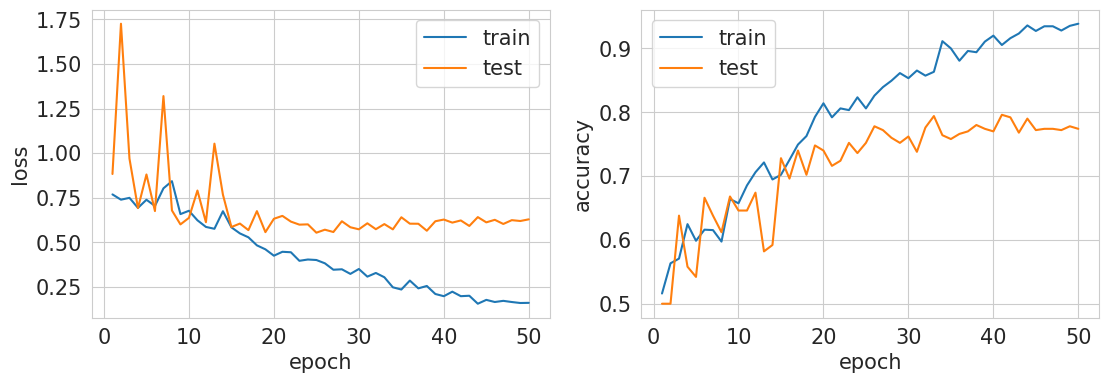

In [ ]:
train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, optimizer, scheduler, criterion, train_loader, val_loader, num_epochs
)

С аугментацией на малой выборке видно что функция потерь равномерно уменьшается на валидации по мере прохождения эпох обучения (до 20 эпохи) и стабилизируется на уровне ~0.62, в то время как на обучении лосс функция равномерно снижается напротяжении всех эпох обучения, в то время как без аугментации функция потерь не снижалась на валидации, а стибилизровалась на уровне 1.0 и постепенно уменьшалась на обучающей выборке, на основании этого модель не могла нормально обобщать, в то время как точность на тестовой выборке равномерно росла как и на валидационной, но на валидации метрика была на уровне 0.7 в конце обучения, в то время как на на обучающей ~0.92

В случае же с аугментацией видно как увеличивается разница точности между классификациями на обучающей и валидационной выборке только с  20 эпохи
(>0.08), далее видно как на валидации модель выдает стаблизированный резльтат метрики (~0.8) (после 40 эпохи), а на обучающей выборке продолжает расти.

Следовательно можно сделать вывод, что аугментация путем фикисирвоания масштабирвоания от 0.5 до 1.0 вместе с последующуй горизонтальной ротацей с вероятностью 0.5 привела к заметной стабилизации модели как на валидации так и на обучающей выборке, по сравнению с тем, что было без нее.

Сделаем так чтобы чтобы модель mobilenet_v2 с весовой классификацией обученной на ImageNet решила нашу задачу классификации котов и кошек, то есть сделаем fine tuning

In [58]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

# Заменяем исходную голову модели на голову с правильным числом классов
model.classifier[1] = torch.nn.Linear(1280, len(train_dataset.classes))
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

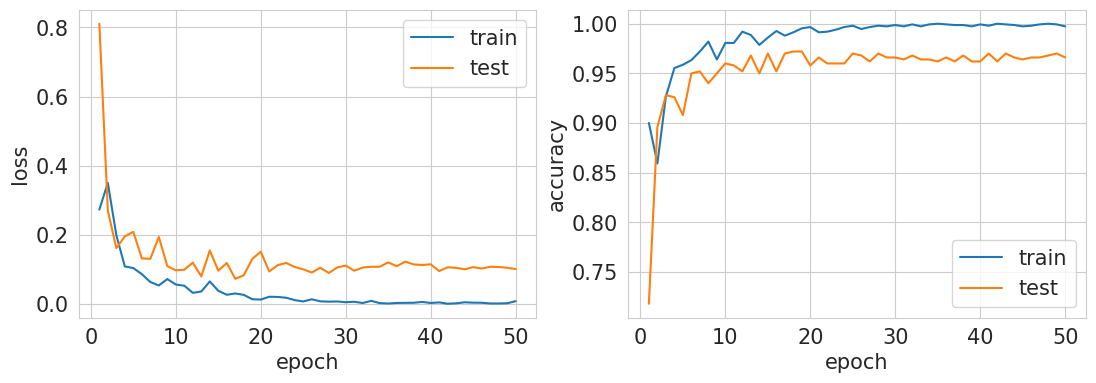

In [59]:
train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, optimizer, scheduler, criterion, train_loader, val_loader, num_epochs
)

Как видно обученная модель на порядок лучше решает задачу классификация в нашей выборке, функция потерь монотонно снижается как на валидации так и на обучени до 20 эпохи до (~0.2 и 0.05) соответсвенно, далее стабилизируется на этом уровне. Accuracy же расет до ~15 эпохи и после нее стабилизируется на уровне ~0.95 и ~0.99 соотвественно.
На основании данных зависимостей, можно уверенно сказать, что данная модель отлично справляется с нашей задачей по сравнению с аугментацией с использованием fine-tuning

Сделаем такъ, чтобы наша модель обучалась не целиком, а именно только последний слой, то есть запретим весам из экстрактора features обучаться, то есть проведем transfer learning

In [60]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

for param in model.parameters():
    param.requires_grad = False

In [61]:
# Заменяем исходную голову модели на голову с правильным числом классов
# и с requires_grad=True by default
model.classifier[1] = torch.nn.Linear(1280, len(train_dataset.classes))
model = model.to(device)

In [63]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

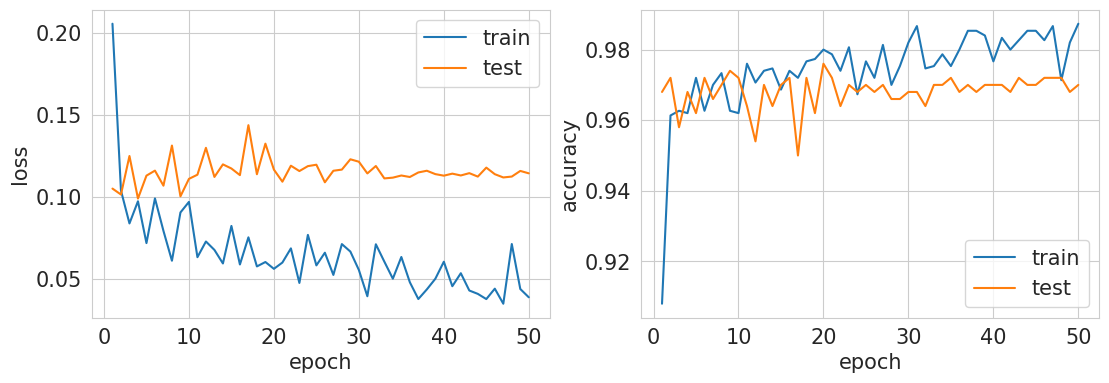

In [65]:
train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, optimizer, scheduler, criterion, train_loader, val_loader, num_epochs
)

Как видно с помощью transfer learning модель быстро выдает хорошие выходные параметры
Лосс функция на валидации стабилизируется у 0.1 почти с 3 эпохи а на обучении монотонно убывает до 0.05 на 50 эпохе
В то же время доля accuracy на валидации и обучении с 3 эпохи растет но с малым углом наклона, на 50 эпохе достигает 0.98 на обучении и 0.97 на валидации

То есть в силу того, что при fine tuning просиходило замена головы модели, то есть ее самых последних слоев и мы позволили модели менять веса во время обучении, были получены более качественные данные (по метрике accuracy и значению функции потерь) чем при transfer learning что и характеризует